# **Step4a -> "Transformación de datos"**

##wd

In [1]:
working_dir = "../data"
working_dir

'../data'

## Archivo de datos: **data_post_step3.csv**


In [2]:
import pandas as pd

df = pd.read_csv("../data/data_post_step3.csv")
print(df.shape)
df.head()

(247816, 11)


,tipo_persona,tipo_contribuyente,porcentaje_propiedad,fecha_adquisicion,fecha_inscripcion_sunarp,clase_vehiculo,categoria_vehiculo,valor_adquisicion_pen,valor_referencial_2025_pen,marca_agrupada,distrito_fiscal_agrupado
0,natural,pequeno,100.0,2022-12-24,2022-12-29,camioneta,b1234_pickup_otros,149323.8,126060,FORD,OTROS
1,natural,pequeno,100.0,2024-04-20,2024-05-15,camioneta,b1234_pickup_otros,52462.5,48930,CHEVROLET,OTROS
2,natural,pequeno,100.0,2023-04-28,2023-05-30,camioneta,b1234_pickup_otros,158062.8,136190,OTROS,OTROS
3,soc_conyugal,pequeno,100.0,2022-09-23,2022-10-27,automovil,a2_1051_1500cc,58068.2,40850,HYUNDAI,OTROS
4,natural,pequeno,100.0,2023-05-30,2023-06-02,camioneta,b1234_pickup_otros,58217.6,64070,JETOUR,OTROS


## Transformación o creación de variables

### Variable porcentaje_propiedad y porcentaje_propiedad_cat

Como se menciono antes porcentaje propiedad podría tener una transformación dada su distribución

In [3]:
df["porcentaje_propiedad"].value_counts()

porcentaje_propiedad
100.00000    237781
50.00000       9686
25.00000         43
33.33000         37
30.00000         35
33.33333         29
33.00000         26
10.00000         25
1.00000          21
33.34000         19
40.00000         18
99.00000         15
34.00000         13
16.67000         12
12.50000          6
66.66000          6
50.50000          5
99.99999          5
75.00000          4
20.00000          4
5.00000           3
60.00000          2
99.99000          2
15.00000          2
35.00000          2
16.70000          2
95.00000          1
47.00000          1
48.00000          1
66.60000          1
80.00000          1
90.00000          1
99.99900          1
33.33330          1
10.67000          1
89.33000          1
70.00000          1
7.14284           1
3.00000           1
Name: count, dtype: int64

In [4]:
import numpy as np

df['porcentaje_propiedad_cat'] = np.where(df['porcentaje_propiedad'] == 100, 'propietario_total', 'copropietario')
print(df['porcentaje_propiedad_cat'].value_counts())
df.drop(columns=['porcentaje_propiedad'], inplace=True)

porcentaje_propiedad_cat
propietario_total    237781
copropietario         10035
Name: count, dtype: int64


### Variable anios_desde_inscripcion

Se creó la variable anios_desde_inscripcion a partir de la fecha de inscripción en SUNARP para representar la antigüedad del vehículo de manera numérica.

In [5]:
df['fecha_adquisicion'] = pd.to_datetime(df['fecha_adquisicion'], errors='coerce')
df['fecha_inscripcion_sunarp'] = pd.to_datetime(df['fecha_inscripcion_sunarp'], errors='coerce')

In [6]:
df['anio_inscripcion_sunarp'] = df['fecha_inscripcion_sunarp'].dt.year
df['anios_desde_inscripcion'] = 2025 - df['anio_inscripcion_sunarp']
df.drop(columns=['anio_inscripcion_sunarp', 'fecha_adquisicion', 'fecha_inscripcion_sunarp'], inplace=True)
df.head()

,tipo_persona,tipo_contribuyente,clase_vehiculo,categoria_vehiculo,valor_adquisicion_pen,valor_referencial_2025_pen,marca_agrupada,distrito_fiscal_agrupado,porcentaje_propiedad_cat,anios_desde_inscripcion
0,natural,pequeno,camioneta,b1234_pickup_otros,149323.8,126060,FORD,OTROS,propietario_total,3
1,natural,pequeno,camioneta,b1234_pickup_otros,52462.5,48930,CHEVROLET,OTROS,propietario_total,1
2,natural,pequeno,camioneta,b1234_pickup_otros,158062.8,136190,OTROS,OTROS,propietario_total,2
3,soc_conyugal,pequeno,automovil,a2_1051_1500cc,58068.2,40850,HYUNDAI,OTROS,propietario_total,3
4,natural,pequeno,camioneta,b1234_pickup_otros,58217.6,64070,JETOUR,OTROS,propietario_total,2


### Exportar datos sin escalar

In [7]:
df.to_csv(f'{working_dir}/datos_post_step4a_no_scaled_no_dummies.csv', index=False, encoding='utf-8')

## Log transform y escalado

In [8]:
df.describe()

,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion
count,2.478160e+05,2.478160e+05,247816.000000
mean,1.209238e+05,9.844988e+04,1.991260
std,1.417678e+05,9.060228e+04,0.801168
min,0.000000e+00,3.030000e+03,1.000000
25%,5.985480e+04,5.266000e+04,1.000000
50%,8.302800e+04,7.134000e+04,2.000000
75%,1.256919e+05,1.056900e+05,3.000000
max,8.110659e+06,1.427600e+06,3.000000


In [9]:
from scipy.stats import skew

variables_numericas = ['valor_adquisicion_pen', 'valor_referencial_2025_pen', 'anios_desde_inscripcion']
print("Skewness original:")
for col in variables_numericas:
    print(f"{col}: {skew(df[col].dropna()):.2f}")

Skewness original:
valor_adquisicion_pen: 7.46
valor_referencial_2025_pen: 3.66
anios_desde_inscripcion: 0.02


In [10]:
import numpy as np

df['valor_adquisicion_log'] = np.log1p(df['valor_adquisicion_pen'])
df['valor_referencial_2025_pen_log'] = np.log1p(df['valor_referencial_2025_pen'])

In [11]:
print("\nSkewness después de log:")
for col in ['valor_referencial_2025_pen_log', 'valor_adquisicion_log']:
    print(f"{col}: {skew(df[col].dropna()):.2f}")


Skewness después de log:
valor_referencial_2025_pen_log: 1.21
valor_adquisicion_log: -4.80


In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['valor_adquisicion_scaled','valor_referencial_scaled', 'anios_desde_inscripcion_scaled']] = scaler.fit_transform(df[['valor_adquisicion_log','valor_referencial_2025_pen_log', 'anios_desde_inscripcion']])

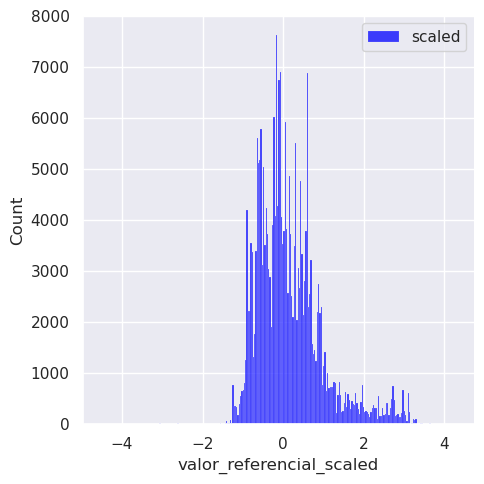

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.displot(df["valor_referencial_scaled"], color="blue", label="scaled")
plt.legend()
plt.show()

In [14]:
df.head(3)

,tipo_persona,tipo_contribuyente,clase_vehiculo,categoria_vehiculo,valor_adquisicion_pen,valor_referencial_2025_pen,marca_agrupada,distrito_fiscal_agrupado,porcentaje_propiedad_cat,anios_desde_inscripcion,valor_adquisicion_log,valor_referencial_2025_pen_log,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
0,natural,pequeno,camioneta,b1234_pickup_otros,149323.8,126060,FORD,OTROS,propietario_total,3,11.913879,11.744521,0.791119,0.817195,0.5
1,natural,pequeno,camioneta,b1234_pickup_otros,52462.5,48930,CHEVROLET,OTROS,propietario_total,1,10.867873,10.798166,-0.618776,-0.541252,-0.5
2,natural,pequeno,camioneta,b1234_pickup_otros,158062.8,136190,OTROS,OTROS,propietario_total,2,11.970754,11.821814,0.867780,0.928145,0.0


### Exportar datos escalados

In [15]:
# Dropear las log y la original no escalada
df.drop(columns=['valor_adquisicion_log', 'valor_referencial_2025_pen_log', 'anios_desde_inscripcion', 'valor_adquisicion_pen', 'valor_referencial_2025_pen'], inplace=True)

In [16]:
df.to_csv(f'{working_dir}/datos_post_step4a_scaled_no_dummies.csv', index=False, encoding='utf-8')

## Variables dummies

In [17]:
df.dtypes

tipo_persona                       object
tipo_contribuyente                 object
clase_vehiculo                     object
categoria_vehiculo                 object
marca_agrupada                     object
distrito_fiscal_agrupado           object
porcentaje_propiedad_cat           object
valor_adquisicion_scaled          float64
valor_referencial_scaled          float64
anios_desde_inscripcion_scaled    float64
dtype: object

In [18]:
# Generar dummies para las variables categóricas
categorical_cols = ['tipo_persona', 'tipo_contribuyente', 'distrito_fiscal_agrupado', 'clase_vehiculo', 'categoria_vehiculo', 'marca_agrupada', 'porcentaje_propiedad_cat']

# Crear dummies 
dummies = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

# Crear df_transform: quitar las columnas categóricas originales y agregar las dummies
df_transform = pd.concat([
    df.drop(columns=categorical_cols), 
    dummies
], axis=1)

print(f"Shape de df_transform: {df_transform.shape}")
df_transform.head(10)

Shape de df_transform: (247816, 79)


,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled,tipo_persona_juridica,tipo_persona_natural,tipo_persona_otros,tipo_persona_soc_conyugal,tipo_contribuyente_grande,tipo_contribuyente_mediano,tipo_contribuyente_pequeno,...,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO,porcentaje_propiedad_cat_copropietario,porcentaje_propiedad_cat_propietario_total
0,0.791119,0.817195,0.5,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,-0.618776,-0.541252,-0.5,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0.867780,0.928145,0.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,-0.481942,-0.800322,0.5,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,-0.478479,-0.154281,0.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5,-0.617736,-0.517972,0.0,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,0.865635,0.882310,0.5,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
7,0.273701,0.508539,-0.5,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
8,0.038945,-0.198648,0.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
9,0.416170,0.623533,0.0,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True


## Exportar datos escalados y dummies

In [19]:
print(f"Shape datos transformados: {df_transform.shape}")
df_transform.head(3)

Shape datos transformados: (247816, 79)


,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled,tipo_persona_juridica,tipo_persona_natural,tipo_persona_otros,tipo_persona_soc_conyugal,tipo_contribuyente_grande,tipo_contribuyente_mediano,tipo_contribuyente_pequeno,...,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO,porcentaje_propiedad_cat_copropietario,porcentaje_propiedad_cat_propietario_total
0,0.791119,0.817195,0.5,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,-0.618776,-0.541252,-0.5,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0.867780,0.928145,0.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True


In [20]:
# Guardar para siguiente step
df_transform.to_csv(f'{working_dir}/datos_post_step4a_scaled_dummies.csv', index=False, encoding='utf-8')